In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv("top_insta_influencers_data.csv")

In [3]:
def convert_units(value):
    if "k" in value:
        var=value.replace("k","")
        result=float(var)*1000
    elif "m" in value:
        var=value.replace("m","")
        result=float(var)*1000000
    elif "b" in value:
        var=value.replace("b","")
        result=float(var)*1000000000
    else:
        result=float(value)
    return result

In [4]:
df["posts"]= df["posts"].apply(convert_units)
df["followers"]= df["followers"].apply(convert_units)
df["avg_likes"]= df["avg_likes"].apply(convert_units)
df["new_post_avg_like"]= df["new_post_avg_like"].apply(convert_units)
df["total_likes"]= df["total_likes"].apply(convert_units)

df.to_csv("newdata.csv")

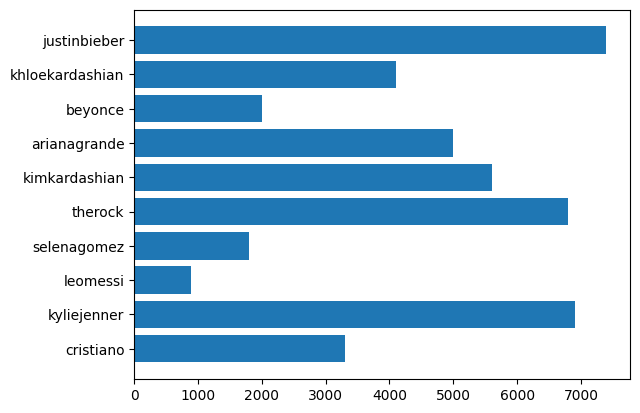

In [5]:
df.sort_values(by="posts",ascending=False)
top_10=df.head(10)

plt.figure()
plt.barh(top_10["channel_info"],top_10["posts"])
plt.show()

ValueError: 'label' must be of length 'x'

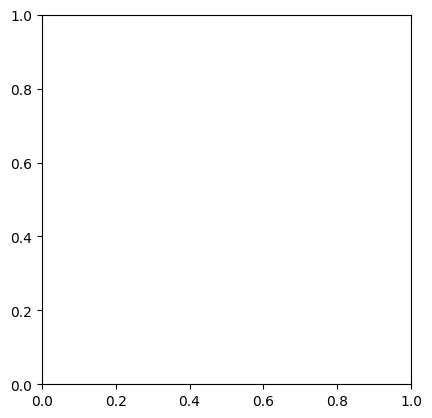

In [6]:
count=df["country"].value_counts()
top_10_country=count.head(10)

count_values = df[df['country'] == 'United States']['channel_info'].value_counts()


plt.figure()
plt.pie(top_10_country, labels=df["channel_info"])
plt.show()